# DEEP SEA CORALS PROJECT
***

# Goal
***

The goal of this project is to gather insights about coral and it's related data from the data set provided.

# Acquire
Acquiring the data from local csv file
***

In [37]:
# establishing environment
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [38]:
# importing data
df = pd.read_csv('deep_sea_corals.csv')

In [39]:
# previewing data
df.head()

,CatalogNumber,DataProvider,ScientificName,VernacularNameCategory,TaxonRank,Station,ObservationDate,latitude,longitude,DepthInMeters,DepthMethod,Locality,LocationAccuracy,SurveyID,Repository,IdentificationQualifier,EventID,SamplingEquipment,RecordType,SampleID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,degrees_north,degrees_east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,625366.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-02,18.30817,-158.45392,959.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:45:26:28
2,625373.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30864,-158.45393,953.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:24:35:53
3,625386.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30877,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:15:22:09
4,625382.0,"NOAA, Deep Sea Coral Research & Technology Pro...",Madrepora oculata,stony coral (branching),species,D2-EX1504L3-05,2015-09-01,18.30875,-158.45384,955.0,reported,"Hawaiian Archipelago, Swordfish Seamount",50m,Hohonu Moana: Exploring Deep Waters off Hawai'i,University of Hawaii,ID by expert from video,D2-EX1504L3-05,ROV,video observation,EX1504L3_05_20150901T181522Z.mp4_05:13:29:50


# Prepare
Preparing the data for exploration and modeling
***

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513373 entries, 0 to 513372
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CatalogNumber            513372 non-null  float64
 1   DataProvider             513372 non-null  object 
 2   ScientificName           513372 non-null  object 
 3   VernacularNameCategory   513197 non-null  object 
 4   TaxonRank                513364 non-null  object 
 5   Station                  253590 non-null  object 
 6   ObservationDate          513367 non-null  object 
 7   latitude                 513373 non-null  object 
 8   longitude                513373 non-null  object 
 9   DepthInMeters            513372 non-null  float64
 10  DepthMethod              496845 non-null  object 
 11  Locality                 389645 non-null  object 
 12  LocationAccuracy         484662 non-null  object 
 13  SurveyID                 306228 non-null  object 
 14  Repo

- Drop columns that will not be used in this iteration of the project
    - CatalogNumber, SampleID, SurveyID, EventID, and Station
        - Categorical columns with vast amounts of unique values that don't offer insight to anything within the scope of this project
    - Locality
        - Column holds a very large amount of categorical values
        - Will be easier to work with if I bin the values as many appear to be near eachother but I'll save this for a later iteration of the project since it may take a significant amount of time

     
     
- Many null values
    - I'll drop them after dropping columns I don't plan to use for this first iteration of this project
        - If too many rows are lost I'll impute values to preserve more rows 
        
        
- Data types look okay for now but I'll update if needed to facilitate operations


- Rename columns 
    - all lowercase
    - "_" between words in names


- Make all values lowercase where applicable


- Edit: DepthInMeters has a negative value in 23 rows.
    - All had a value of -999
    - I'm not certain but I suspect that this value was used instead of null
    - I'm going to drop these rows as well
    
- Edit: There are rows that contain data about sponges and other non-coral creatures
    - Removing all non-coral creatures from data

### Dropping Columns

In [41]:
# dropping specified columns
df = df.drop(columns = ['CatalogNumber', 'SampleID', 'SurveyID', 'EventID', 'Station', 'Locality'])

### Dropping Nulls

In [42]:
# dropping all null values
df = df.dropna()

### Renaming Columns

In [43]:
# adding underscores to various column names
df.columns = ['Data_Provider', 'Scientific_Name', 'Vernacular_Name_Category', 'Taxon_Rank',
              'Observation_Date', 'latitude', 'longitude', 'Depth_Meters','Depth_Method', 
              'Location_Accuracy', 'Repository', 'Identification_Qualifier', 'Sampling_Equipment',
              'Record_Type']

# lower casing all column names
df.columns = df.columns.str.lower()

### Converting all values to lower case

In [44]:
df = df.applymap(lambda string:string.lower() if type(string) == str else string)

### Dropping rows with negative depth_meters value

In [45]:
df = df[df.depth_meters >= 0]

### Removing non-coral creatures from data

In [53]:
df = df[df.vernacular_name_category.str.contains('coral') & (df.vernacular_name_category.str.contains('hydrozoan') == False)]

# Explore
Exploring the data to draw insights about the corals and the data related to them.
***

In [54]:
df.columns

Index(['data_provider', 'scientific_name', 'vernacular_name_category',
       'taxon_rank', 'observation_date', 'latitude', 'longitude',
       'depth_meters', 'depth_method', 'location_accuracy', 'repository',
       'identification_qualifier', 'sampling_equipment', 'record_type'],
      dtype='object')

## What are the major sources of this data?

In [55]:
round(df.data_provider.value_counts() / len(df),2).head(10)

monterey bay aquarium research institute                                                           0.31
noaa, alaska fisheries science center                                                              0.13
hawaii undersea research laboratory                                                                0.13
noaa, olympic coast national marine sanctuary                                                      0.09
noaa, southwest fisheries science center, santa cruz                                               0.09
noaa, office of ocean exploration and research                                                     0.05
temple university                                                                                  0.05
smithsonian institution, national museum of natural history                                        0.03
noaa, deep sea coral research & technology program and office of ocean exploration and research    0.02
harbor branch oceanographic institute                           

- After the Monterey Bay Aquarium Research Institute, NOAA appears to be the next largest provider
- I'm going to find out how many observations come from one of NOAA's facilities

In [56]:
a = round(df[df.data_provider.str.contains('noaa')].data_provider.value_counts() / len(df), 2)

print(a,'\n')
print(f'Total % of observations from NOAA: {a.sum() * 100}%')

noaa, alaska fisheries science center                                                              0.13
noaa, olympic coast national marine sanctuary                                                      0.09
noaa, southwest fisheries science center, santa cruz                                               0.09
noaa, office of ocean exploration and research                                                     0.05
noaa, deep sea coral research & technology program and office of ocean exploration and research    0.02
noaa, flower garden banks national marine sanctuary                                                0.02
noaa, southwest fisheries science center, la jolla                                                 0.02
noaa, channel islands national marine sanctuary                                                    0.01
noaa, office of response and restoration                                                           0.01
noaa, northwest fisheries science center                        

- Approximately 31% of the data comes from the Monteret Bay Aquiarium Research Institute
- Approximately 46% of the data comes from NOAA facilities
- The remaining ~23% of observations come from alternate facilities

## What is the range of dates that the observations cover?

In [57]:
first_date = df.observation_date.min()

last_date = df.observation_date.max()

print(f'The dates of the observations range from {first_date} to {last_date}.')

The dates of the observations range from 1868-05-04 to 2016-03-27.


## What are the shallowest and deepest depths within the data?

In [58]:
least_deep = df.depth_meters.min()
most_deep = df.depth_meters.max()

print(f'The most shallow observation(s) had a depth of {least_deep}, and the deepest observation(s) had a depth of {most_deep}.')

The most shallow observation(s) had a depth of 0.0, and the deepest observation(s) had a depth of 5303.0.


## How many different types of corals are represented in data? (vernacular name)

In [59]:
vernac_count = df.vernacular_name_category.value_counts()

print(vernac_count,'\n')
print(f'There are {len(vernac_count)} different types of corals in the data.')

gorgonian coral              132830
soft coral                    37769
black coral                   21481
lace coral                    19496
stony coral (branching)       12627
stony coral (cup coral)        5599
stony coral (unspecified)      3979
gold coral                     2599
stoloniferan coral              854
lithotelestid coral               1
Name: vernacular_name_category, dtype: int64 

There are 10 different types of corals in the data.


## What was the most common type of sampling equipment used?


In [60]:
equip_count = df.sampling_equipment.value_counts()

print(equip_count,'\n')
print(f'There are {len(equip_count)} different types of equipment in the data.')

rov               150620
submersible        47921
trawl              15164
towed camera       13660
longline            6120
auv                 1740
drop camera         1161
dredge               653
net                   90
multiple gears        69
scuba                 10
grab                   9
trap                   8
pot                    5
corer                  2
other                  2
hook and line          1
Name: sampling_equipment, dtype: int64 

There are 17 different types of equipment in the data.


## What types of methods were used to qualify the data?

In [61]:
df.identification_qualifier.value_counts()

id from video                                                        73462
id by expert from video                                              59213
id by expert from image                                              26624
field id by non-expert from video                                    23586
id by expert from still images                                       12828
field id by non-expert from trawl survey bycatch specimen            10025
good - id from video                                                  7887
id by non-expert from sample                                          6117
morphological id by taxonomic expert                                  4642
field id                                                              3704
morphological id from sample by taxonomic expert                      3088
id by non-expert from video                                           2661
field id by non-expert from photo                                      757
non-expert               

- Videos, images, and photos appear to be the most common identification qualifiers
- I'd like to know how much of the data was qualified using these methods

## How much data was qualified using video?

In [62]:
vids = round(df[df.identification_qualifier.str.contains('video')].identification_qualifier.value_counts() / len(df), 2)

print(vids,'\n')
print(f'Total % of observations qualified by video: {round(vids.sum()*100, 2)}%')

id from video                        0.31
id by expert from video              0.25
field id by non-expert from video    0.10
good - id from video                 0.03
id by non-expert from video          0.01
poor - id from video                 0.00
expert from video                    0.00
questionable - id from video         0.00
id from video by expert              0.00
Name: identification_qualifier, dtype: float64 

Total % of observations qualified by video: 70.0%


## How much data was qualified using photos or images?

In [63]:
photos = df[(df.identification_qualifier.str.contains('photo')) | (df.identification_qualifier.str.contains('image'))].identification_qualifier.value_counts() / len(df)
            
print(photos,'\n')
print(f'Total % of observations qualified by photos or images: {round(photos.sum()*100, 2)}%')            

id by expert from image              0.112226
id by expert from still images       0.054073
field id by non-expert from photo    0.003191
id by non-expert from image          0.001817
non-expert from image                0.001517
field id by expert from photo        0.000447
id by expert from in situ photo      0.000413
Name: identification_qualifier, dtype: float64 

Total % of observations qualified by photos or images: 17.37%


- Videos qualified approximately 68% of observations
- Photos or Images qualified approximately 13% of observations
- Combined, more than 80% of the data was was qualified with either photos, images, or videos

In [64]:
def df_to_gdf(df):
    coordinates = df[['latitude', 'longitude']].astype(float).values
    coordinates = pd.DataFrame(data = coordinates)
    coordinates.columns = ['latitude', 'longitude']
    coordinates = [Point(xy) for xy in zip(coordinates.longitude, coordinates.latitude)]
    geo_df = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=coordinates)
    return geo_df

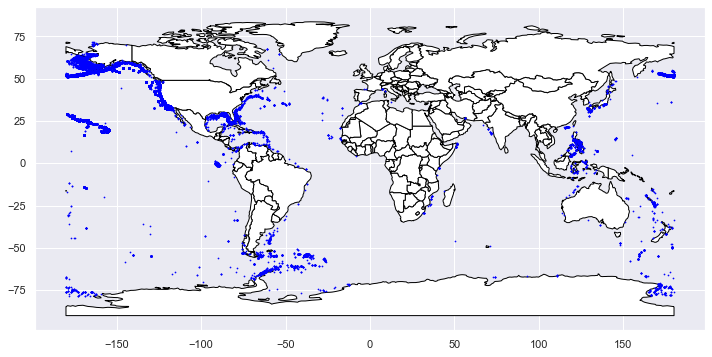

In [66]:
# setting figure size for all plots
sns.set(rc = {'figure.figsize':(12,8)})

#loading worldmap
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
base = world.plot(color='white', edgecolor='black')

coral_vernacs = df[df.vernacular_name_category.str.contains('coral')]


#to geo dataframe
coral_obs = df_to_gdf(coral_vernacs)


coral_obs.plot(ax=base, marker='o', color='blue', markersize=0.5)

plt.show()

In [24]:
df.vernacular_name_category.value_counts()

gorgonian coral               132830
sponge (unspecified)           74409
sea pen                        63154
glass sponge                   54335
soft coral                     37769
demosponge                     35020
black coral                    21481
lace coral                     19496
stony coral (branching)        12627
stony coral (cup coral)         5599
stony coral (unspecified)       3979
gold coral                      2599
stoloniferan coral               854
calcareous sponge                766
scleromorph sponge               258
other coral-like hydrozoan       140
lithotelestid coral                1
Name: vernacular_name_category, dtype: int64